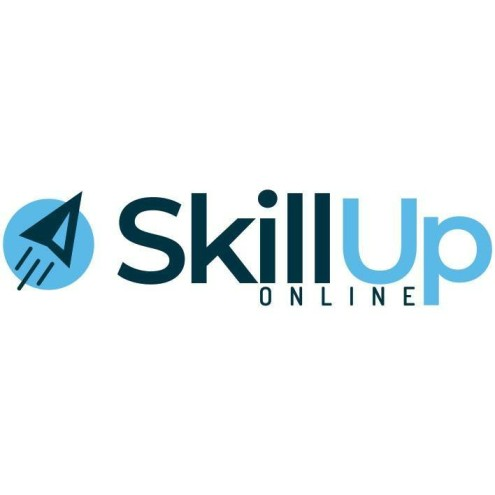

# **Credit Card Fraud Detection**

Link to dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


### Import the necessary libraries

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import and organize the dataset



In [ ]:
# Organize the data in a dataframe


In [3]:
# Load the dataset

from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
# Load the dataset
data = pd.read_csv("creditcard.csv")

# Display the first 10 rows of the dataset
print(data.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [5]:
# Check the size of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Show an overview of the columns
print(data.info())

The dataset has 284807 rows and 31 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20 

In [6]:
# Check the number of unique values ​​in the 'Class' column
print(data['Class'].value_counts())

# View percentage of fraud vs. non-fraud
frauds = data['Class'].value_counts(normalize=True) * 100
print(f"Percentage of legitimate transactions: {frauds[0]:.2f}%")
print(f"Percentage of frauds: {frauds[1]:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64
Percentage of legitimate transactions: 99.83%
Percentage of frauds: 0.17%


In [7]:
# Statistical summary of the dataset
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Clear the data

*a*. Missing values



In [8]:
# Create a boolean dataframe where True indicates null values and False indicates non-null values
# Then use sum() to count the number of null values in each column
null_values = data.isnull().sum()

# Display the results
print("Null values per column:")
print(null_values)

Null values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


b. Duplicate data

In [9]:
# Check the number of duplicate transactions
duplicates = data.duplicated().sum()
print(f"Number of duplicate transactions: {duplicates}")

Number of duplicate transactions: 1081


In [10]:
# Remove duplicates
data = data.drop_duplicates()

# Check the size of the dataset after removing duplicates
print(f"Duplicates removed. The dataset now has {data.shape[0]} rows.")

Duplicates removed. The dataset now has 283726 rows.


In [11]:
# Confirm null values
null_values = data.isnull().sum()
print("Null values per column after checking for duplicates:")
print(null_values)

Null values per column after checking for duplicates:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


c. Data normalization

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply normalization to 'Time' and 'Amount' columns
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Display a summary of the normalized columns
print("Normalized data (summary):")
print(data[['Time', 'Amount']].describe())

Normalized data (summary):
               Time        Amount
count  2.837260e+05  2.837260e+05
mean   1.218105e-16 -5.409347e-17
std    1.000002e+00  1.000002e+00
min   -1.996823e+00 -3.533268e-01
25%   -8.552128e-01 -3.309625e-01
50%   -2.131081e-01 -2.654671e-01
75%    9.369423e-01 -4.378088e-02
max    1.642362e+00  1.022476e+02


### Analyze the **data**

Question 1: What is the percentage of fraudulent transactions in the dataset?

In [13]:
# Calculate the percentage of fraudulent transactions
total_transactions = len(data)
fraudulent = data[data['Class'] == 1].shape[0] # Count transactions where Class == 1
fraud_percentage = (fraudulent / total_transactions) * 100

# Display the percentage of fraudulent transactions
print(f"Fraudulent transaction percentage: {fraud_percentage:.2f}%")

Fraudulent transaction percentage: 0.17%


Question 2: What is the average amount of fraudulent transactions?





In [14]:
# Filter the dataset for fraudulent transactions
fraudulent_transactions = data[data['Class'] == 1]

# Calculate the average amount of fraudulent transactions
fraud_average_amount = fraudulent_transactions['Amount'].mean()

# Display the average amount of fraudulent transactions
print(f"The average amount of fraudulent transactions is: {fraud_average_amount:.2f} euros")


The average amount of fraudulent transactions is: 0.14 euros


In [15]:
# Check the Amount column for fraudulent transactions
print(fraudulent_transactions['Amount'].head())

541    -0.353327
623     1.759301
4920    0.604864
6108   -0.117703
6329   -0.349333
Name: Amount, dtype: float64


### Visualize the **data**

**Question 1: How many fraudulent transactions are there compared to non-fraudulent ones?**

Part 1: Comparison of Fraudulent vs. Non-Fraudulent Transactions

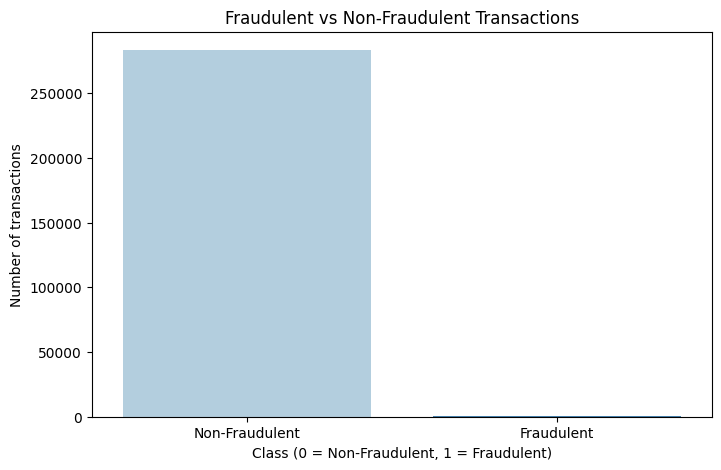

In [ ]:
# Count fraudulent and non-fraudulent transactions
count = data['Class'].value_counts()

# Visualize with a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=count.index, y=count.values, palette='Blues')
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Class (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.ylabel("Number of transactions")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.show()

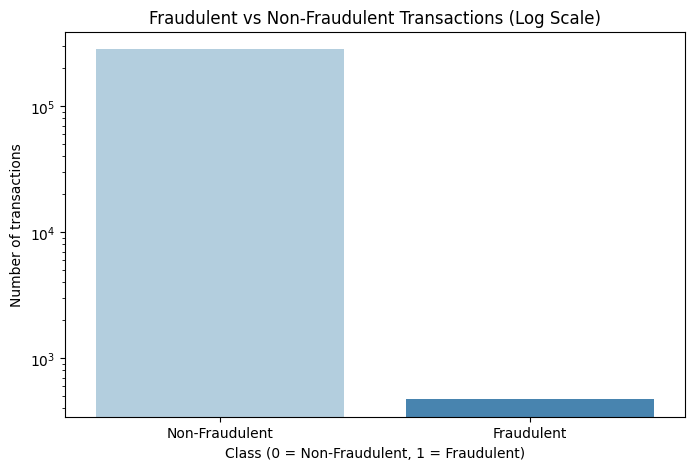

In [ ]:
# Display with a bar chart by adjusting the scale
plt.figure(figsize=(8, 5))
sns.barplot(x=count.index, y=count.values, palette='Blues')
plt.title("Fraudulent vs Non-Fraudulent Transactions (Log Scale)")
plt.xlabel("Class (0 = Non-Fraudulent, 1 = Fraudulent)")
plt.ylabel("Number of transactions")
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.yscale('log') # Change the Y-axis to a log scale
plt.show()

Parte 2: Distribución de los importes de las transacciones fraudulentas (Histograma)

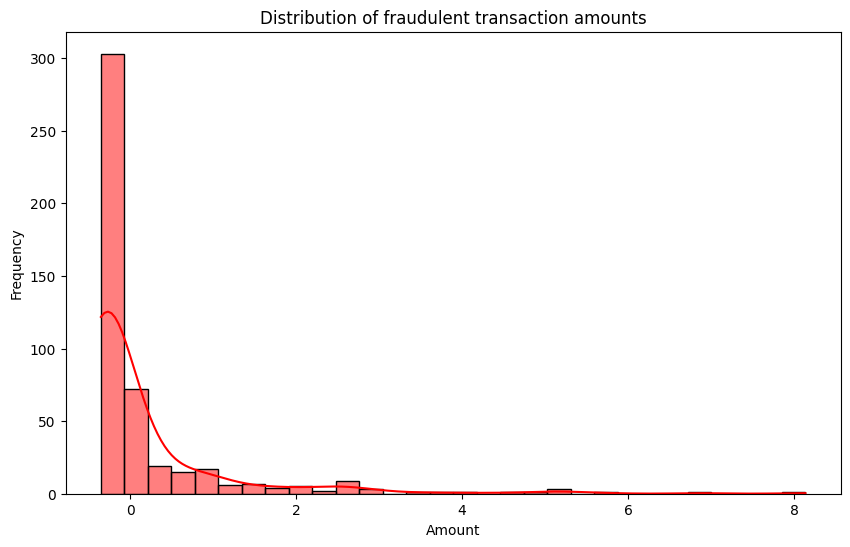

In [17]:
# Filter fraudulent transactions
fraudulent_transactions = data[data['Class'] == 1]

# Display the distribution of amounts
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['Amount'], bins=30, kde=True, color='red')
plt.title("Distribution of fraudulent transaction amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

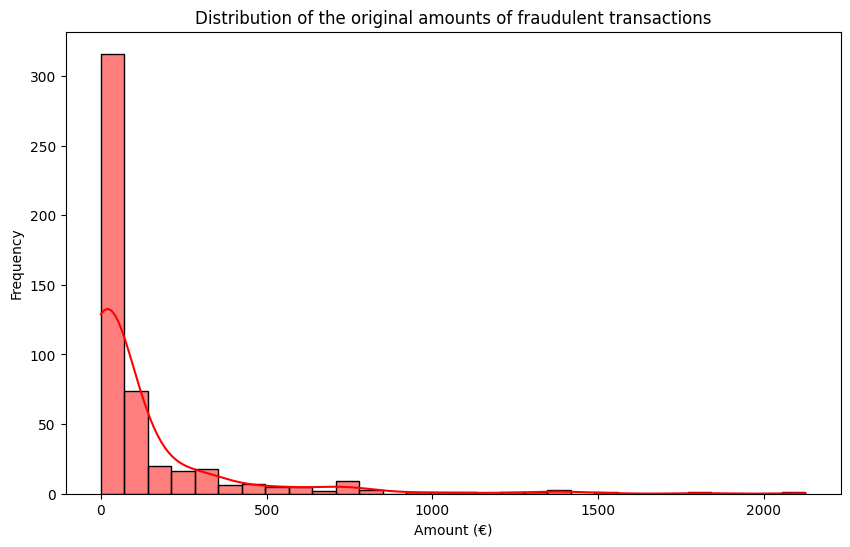

In [18]:
# Filter fraudulent transactions in the original dataset
fraudulent_transactions_original = data_original[data_original['Class'] == 1]

# Display the distribution of the original amounts of fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions_original['Amount'], bins=30, kde=True, color='red')
plt.title("Distribution of the original amounts of fraudulent transactions")
plt.xlabel("Amount (€)")
plt.ylabel("Frequency")
plt.show()

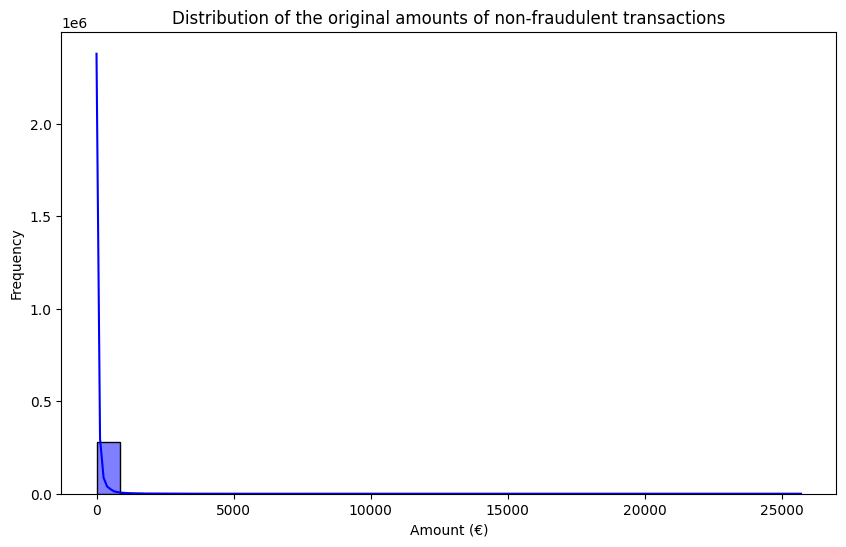

In [19]:
# Filter out non-fraudulent transactions in the original dataset
non_fraudulent_transactions_original = data_original[data_original['Class'] == 0]

# Display the distribution of the original amounts of non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(non_fraudulent_transactions_original['Amount'], bins=30, kde=True, color='blue')
plt.title("Distribution of the original amounts of non-fraudulent transactions")
plt.xlabel("Amount (€)")
plt.ylabel("Frequency")
plt.show()

**Question 2: What is the distribution of the amounts of fraudulent transactions?**

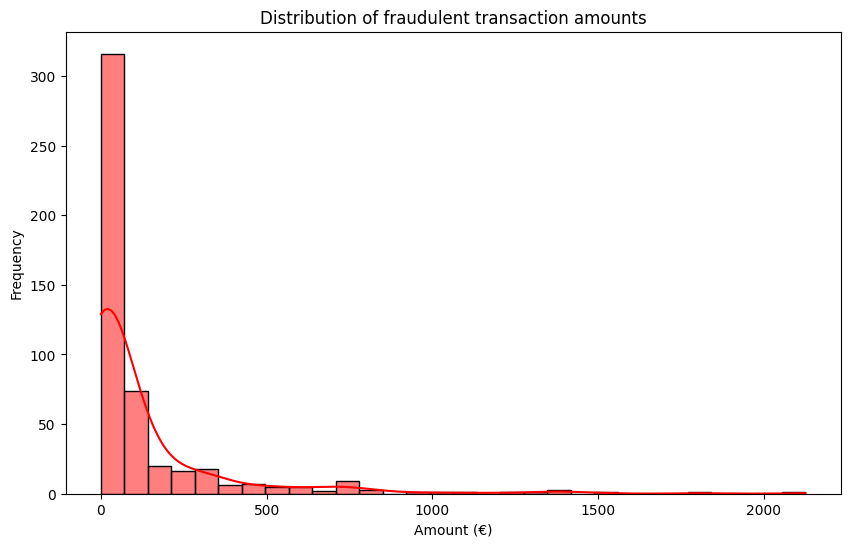

In [20]:
# Filter fraudulent transactions
fraudulent_transactions = data_original[data_original['Class'] == 1]

# Display the distribution of fraudulent transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(fraudulent_transactions['Amount'], bins=30, kde=True, color='red')
plt.title("Distribution of fraudulent transaction amounts")
plt.xlabel("Amount (€)")
plt.ylabel("Frequency")
plt.show()

## Model development and evaluation

### Separate from the dataset

In [21]:
from sklearn.model_selection import train_test_split

# Split the features (X) and labels (y)
X = data_original.drop(columns=['Class']) # All columns except 'Class'
y = data_original['Class'] # Only the 'Class' column

# Split the data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the ensemble sizes
print(f"Training data size: {X_train.shape[0]} rows")
print(f"Test data size: {X_test.shape[0]} rows")

Training data size: 227845 rows
Test data size: 56962 rows


In [22]:
# Distribution in training data
print("Distribution in training data:")
print(y_train.value_counts(normalize=True) * 100)

# Distribution in test data
print("\nDistribution in test data:")
print(y_test.value_counts(normalize=True) * 100)

Distribution in training data:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Distribution in test data:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Create and evaluate the models

In [23]:
#Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Model RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=150, random_state=42)

# Train the model with the training data
modelo_rf.fit(X_train, y_train)

# Make predictions with test data
y_pred = modelo_rf.predict(X_test)

# Evaluate the model
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Calculate and show the overall accuracy
precision_general = accuracy_score(y_test, y_pred)
print(f"\nPrecisión general del modelo: {precision_general * 100:.2f}%")


Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Precisión general del modelo: 99.96%


In [24]:
# Create an instance of the RandomForestClassifier model with class_weight='balanced'
rf_model_balanced = RandomForestClassifier(max_depth=150, random_state=42, class_weight='balanced')

# Train the model with the training data
rf_model_balanced. fit(X_train, y_train)

# Make predictions with the test data
y_pred_balanced = rf_model_balanced. predict(X_test)

# Evaluate the fitted model
print("Classification report (fitted with class_weight='balanced'):")
print(classification_report(y_test, y_pred_balanced))

# Calculate and display the overall accuracy
precision_general_balanced = accuracy_score(y_test, y_pred_balanced)
print(f"\nOverall accuracy of the fitted model: {precision_general_balanced * 100:.2f}%")

Classification report (fitted with class_weight='balanced'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Overall accuracy of the fitted model: 99.96%


**Training the model with XGBoost**

In [25]:
pip install xgboost

In [26]:
from xgboost import XGBClassifier

In [29]:
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Instantiate the XGBoost model
xgb_model = XGBClassifier(
    max_depth=6,          # Maximum tree depth
    learning_rate=0.1,    # Learning rate
    n_estimators=100,     # Number of trees
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handling imbalance
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_xgb = xgb_model.predict(X_test)  # Correct variable name here

# Evaluate the model
print("Classification report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

# Calculate and display overall accuracy
precision_general_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nOverall accuracy of the XGBoost model: {precision_general_xgb * 100:.2f}%")

Classification report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Overall accuracy of the XGBoost model: 99.95%


In [31]:
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Create and fit an XGBoost model with different hyperparameters
fit_xgb_model = XGBClassifier(
    max_depth=8,          # Increase the tree depth
    learning_rate=0.05,   # Reduce the learning rate
    n_estimators=150,     # Increase the number of trees
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle imbalance
    random_state=42
)

# Train the fitted model
fit_xgb_model.fit(X_train, y_train)

# Make predictions
fit_xgb_y_pred = fit_xgb_model.predict(X_test)

# Evaluate the fitted model
print("Classification report (fitted XGBoost):")
print(classification_report(y_test, fit_xgb_y_pred))  # Use the correct variable

# Overall accuracy
adjusted_overall_accuracy = accuracy_score(y_test, fit_xgb_y_pred)  # Use the correct variable
print(f"\nOverall accuracy of the fitted model: {adjusted_overall_accuracy * 100:.2f}%")

Classification report (fitted XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Overall accuracy of the fitted model: 99.96%


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution after SMOTE
print("Distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train an XGBoost model with the balanced data
xgb_model_smote = XGBClassifier(
    max_depth=6,         # Keep parameters moderate to avoid overfitting
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Train the model
xgb_model_smote.fit(X_train_smote, y_train_smote)  # Correct variable name

# Make predictions on test data
y_pred_xgb_smote = xgb_model_smote.predict(X_test)  # Correct variable name

# Evaluate the model with SMOTE
print("\nClassification report (XGBoost + SMOTE):")
print(classification_report(y_test, y_pred_xgb_smote))

# Overall accuracy
precision_general_smote = accuracy_score(y_test, y_pred_xgb_smote)
print(f"\nOverall accuracy of XGBoost + SMOTE model: {precision_general_smote * 100:.2f}%")

Distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64

Classification report (XGBoost + SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.86      0.68        98

    accuracy                           1.00     56962
   macro avg       0.78      0.93      0.84     56962
weighted avg       1.00      1.00      1.00     56962


Overall accuracy of XGBoost + SMOTE model: 99.86%


# Final Summary and Conclusions

## 1. Data Loading and Cleaning
- **Duplicates Removed**: 1,081 duplicate transactions.
- **Null Values**: No null values ​​were found in the dataset.
- **Normalization**: The `Time` and `Amount` columns were normalized to improve model performance.

## 2. Data Exploration
- **Class Distribution**:
- Non-fraudulent class (`Class = 0`): **99.83%**.
- Fraudulent class (`Class = 1`): **0.17%**.
- **Amount Distribution**:
- Frauds are concentrated in low amounts (0-500 euros).
- Non-fraudulent transactions have a broader distribution.

## 3. Data Splitting
- **80% Training**: 227,845 transactions.
- **20% Test**: 56,962 transactions.
- Class ratio maintained in both groups.

## 4. Trained models and comparisons
### RandomForestClassifier
- **Recall (Class = 1)**: **77%**
- **Accuracy (Class = 1)**: **99%**
- **F1-score (Class = 1)**: **86%**

### XGBoost (base)
- **Recall (Class = 1)**: **83%**
- **Accuracy (Class = 1)**: **89%**
- **F1-score (Class = 1)**: **86%**

### XGBoost (tuned hyperparameters)
- **Recall (Class = 1)**: **81%**
- **Accuracy (Class = 1)**: **93%**
- **F1-score (Class = 1)**: **86%**

### XGBoost + SMOTE
- **Recall (Class = 1)**: **83%**
- **Accuracy (Class = 1)**: **89 ... = 1)**: **86%**
- **Accuracy (Class = 1)**: **56%**
- **F1-score (Class = 1)**: **68%**

## 5. Final Conclusions
- **Best model**: Adjusted XGBoost.
- **Accuracy**: **93%**, **Recall**: **81%**, **F1-score**: **86%**.
- **SMOTE**:
- Improves recall (86%) but decreases accuracy (56%).
- **Recommendation**:
- Choose the model according to the objective: maximize recall or balance precision and recall.